In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import matplotlib as mpl
mb = (0, 0.4470, 0.7410)
mr = (0.8500, 0.3250, 0.0980)
lmr = (0.9500, 0.7250, 0.5980)
lmb = (0.5, 0.7470, 0.8710)
# Set the font family to Times New Roman

mpl.rcParams['font.family'] = 'Nimbus Roman'
mpl.rcParams['font.weight'] = 'normal'

In [10]:
FirstTime = False

path = '/data/bioxfel/data/kirianlab/projects/triggered-droplets/20240711'
filename = 'run3.avi'

file_path = os.path.join(path, filename)

# Load the video
cap = cv2.VideoCapture(file_path)

# Get the number of frames in the video
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get the width and height of the frames in the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create an empty numpy array to store the video frames
video_frames = np.zeros((frame_count, frame_height), np.dtype('float'))

frame_accumulator = np.zeros((1000,frame_height, frame_width), np.dtype('float'))

print(frame_width, frame_height, frame_count)
      
t0 = time.time()

median_frame = np.load('median.npz')['med']
# Read the frames from the video and store them in the numpy array
i = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:

        break
    sframe = np.sum(frame,axis=2)
    comp = np.min(sframe-median_frame, axis=1)

    video_frames[i] = comp
    frame_accumulator[i % 1000,:,:] = sframe
    i += 1

    if i % 1000 == 0:
        if FirstTime:
            median_frame = np.median(frame_accumulator, axis=0)
            np.savez('median.npz', med = median_frame)
        print(f"Progress: {i}/{frame_count}")
# code_block
t1 = time.time()

total = t1-t0
print(total," sec")
cap.release()

216 788 43638
Progress: 1000/43638
Progress: 2000/43638
Progress: 3000/43638
Progress: 4000/43638
Progress: 5000/43638
Progress: 6000/43638
Progress: 7000/43638
Progress: 8000/43638
Progress: 9000/43638
Progress: 10000/43638
Progress: 11000/43638
Progress: 12000/43638
Progress: 13000/43638
Progress: 14000/43638
Progress: 15000/43638
Progress: 16000/43638
Progress: 17000/43638
Progress: 18000/43638
Progress: 19000/43638
Progress: 20000/43638
Progress: 21000/43638
Progress: 22000/43638
Progress: 23000/43638
Progress: 24000/43638
Progress: 25000/43638
Progress: 26000/43638
Progress: 27000/43638
Progress: 28000/43638
Progress: 29000/43638
Progress: 30000/43638
Progress: 31000/43638
Progress: 32000/43638
Progress: 33000/43638
Progress: 34000/43638
Progress: 35000/43638
Progress: 36000/43638
Progress: 37000/43638
Progress: 38000/43638
Progress: 39000/43638
Progress: 40000/43638
Progress: 41000/43638
Progress: 42000/43638
Progress: 43000/43638
202.50184035301208  sec


In [11]:
np.savez_compressed('unsync.npz', res=video_frames)

In [12]:
path = '/data/bioxfel/data/kirianlab/projects/triggered-droplets/20240711'
filename = 'run4.avi'

file_path = os.path.join(path, filename)

# Load the video
cap = cv2.VideoCapture(file_path)

# Get the number of frames in the video
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get the width and height of the frames in the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create an empty numpy array to store the video frames
video_frames = np.zeros((frame_count, frame_height), np.dtype('float'))


print(frame_width, frame_height, frame_count)
      
t0 = time.time()

median_frame = np.load('median.npz')['med']
# Read the frames from the video and store them in the numpy array
i = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    sframe = np.sum(frame,axis=2)
    comp = np.min(sframe-median_frame, axis=1)

    video_frames[i] = comp
    frame_accumulator[i % 1000,:,:] = sframe
    i += 1

    if i % 1000 == 0:
        print(f"Progress: {i}/{frame_count}")
    #if i > 10001:
    #    break
# code_block
t1 = time.time()

total = t1-t0
print(total," sec")
cap.release()

216 788 90388
Progress: 1000/90388
Progress: 2000/90388
Progress: 3000/90388
Progress: 4000/90388
Progress: 5000/90388
Progress: 6000/90388
Progress: 7000/90388
Progress: 8000/90388
Progress: 9000/90388
Progress: 10000/90388
Progress: 11000/90388
Progress: 12000/90388
Progress: 13000/90388
Progress: 14000/90388
Progress: 15000/90388
Progress: 16000/90388
Progress: 17000/90388
Progress: 18000/90388
Progress: 19000/90388
Progress: 20000/90388
Progress: 21000/90388
Progress: 22000/90388
Progress: 23000/90388
Progress: 24000/90388
Progress: 25000/90388
Progress: 26000/90388
Progress: 27000/90388
Progress: 28000/90388
Progress: 29000/90388
Progress: 30000/90388
Progress: 31000/90388
Progress: 32000/90388
Progress: 33000/90388
Progress: 34000/90388
Progress: 35000/90388
Progress: 36000/90388
Progress: 37000/90388
Progress: 38000/90388
Progress: 39000/90388
Progress: 40000/90388
Progress: 41000/90388
Progress: 42000/90388
Progress: 43000/90388
Progress: 44000/90388
Progress: 45000/90388
Progr

In [13]:
np.savez_compressed('synctrig.npz', res=video_frames, sframe=sframe)

In [14]:
frame = np.load('synctrig.npz')['sframe']

In [15]:
res1 = np.load('unsync.npz')['res']
res2 = np.load('synctrig.npz')['res']
print(res1.shape)
print(res2.shape)
for i in np.arange(0,res1.shape[0]-200,200):
    res1[i:(i+200)] = res1[i]

(43638, 788)
(90388, 788)


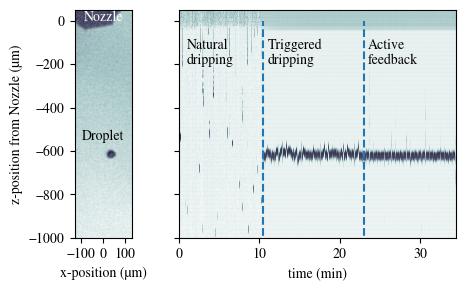

In [25]:
res = np.concatenate((res1[:-5000],res2), axis=0)
frame_count = res.shape[0]

numberOfPixels = 260
Length = 25400/4/10
fps = 62.5

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(5, 3),gridspec_kw={'width_ratios': [.5, 2]})  # 2 rows, 1 column
extent = np.array([-frame.shape[1]/4*Length/numberOfPixels, frame.shape[1]/4*Length/numberOfPixels, -1850, frame.shape[0]*Length/numberOfPixels-1850])
# Plotting the first subplot (imshow of 'frame')
ax1.imshow(frame[:,54:162], cmap='bone',extent=extent)
ax1.set_ylim([-1000,50])
ax1.set_ylabel('z-position from Nozzle (µm)')
ax1.set_xlabel('x-position (µm)')
ax1.text(1, 0, 'Nozzle', color='w', horizontalalignment='center')
ax1.text(1, -550, 'Droplet', color='k', horizontalalignment='center')
extent = np.array([0, frame_count/fps/60, -1850, res.shape[1]*Length/numberOfPixels-1850])
ax2.imshow(res.T,aspect=.027,cmap='bone',extent=extent, interpolation="antialiased")
#ax2.set_ylabel('z-position from nozzle (µm)')
ax2.set_xlabel('time (min)')
ax2.set_ylim([-1000,50])
ax2.set_yticklabels([])

#plt.colorbar(label='Intensity')  # Add colorbar with label
ax2.plot([10.5,10.5,np.nan,23,23],[-1800,0,0,-1800,0],'--')
# Add text labels
ax2.text(1, -200, 'Natural\ndripping', horizontalalignment='left')
ax2.text(11, -200, 'Triggered\ndripping', horizontalalignment='left')
ax2.text(23.5, -200, 'Active\nfeedback', horizontalalignment='left')
plt.tight_layout()
plt.savefig('waterfall_antialiased.pdf', format='pdf', dpi=300)
plt.savefig('waterfall_antialiased.png', dpi=300)
plt.show()

In [26]:
print(frame.shape)
print(res.shape)

(788, 216)
(129026, 788)


In [27]:
14*Length/numberOfPixels

34.19230769230769

In [28]:
res -= np.median(res)
res[:,0:50] = res[:,50:100]
res_ft = np.fft.fft(res)
res_temp = np.fft.fft(res[-1,:])
cc = np.abs(np.fft.ifft(res_ft*np.conj(res_temp)))
cc = np.fft.fftshift(cc,axes=1)
a = np.argmax(cc, axis = 1)
b = a-np.median(a)
b *= 635/260



In [29]:
import matplotlib.patches as patches
plt.figure(figsize=(5,4))
var = [0,res1[:-5000].shape[0],int(res1[:-5000].shape[0]+.5*(cc.shape[0])-res1[:-5000].shape[0]),cc.shape[0]]
print(var)
ellipse = patches.Ellipse((0, 0.6), width=46, height=0.5, angle=0, edgecolor='k', facecolor='none', alpha=1, label='45 µm droplet')
plt.gca().add_patch(ellipse)
# for i in range(3):
#     pos = b[var[i]: var[i+1]]
#     print(np.std(pos))
# #     (data,bins)= np.histogram(pos,bins=np.arange(-300,300,10))
# #     x = (bins[1:]-bins[:-1])*.5
# #     plt.plot(x,data)
# #     plt.hist(pos,bins=np.arange(-300,300,10))
#     plt.show()
for i, label in zip(range(3), ['Natural dripping', 'Triggered dripping', 'Active feedback']):
    pos = b[var[i]: var[i + 1]]
    if label == 'Controlled':
        edgecolor = 'black'  # Black border for 'Controlled'
    else:
        edgecolor = None  
    plt.hist(pos, bins=np.arange(-50, 50, 10), alpha=0.5, label=label, weights=np.ones_like(pos)/(var[i+1]-var[i]), edgecolor=edgecolor)
# Add a blue ellipse with aspect ratio 0.1 and positioned at (0, 0.6)

plt.ylim([0,.8])
plt.xlabel('Droplet Position (µm)')
plt.ylabel('Hit Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('DropletHitRate1.pdf',bbox_inches='tight')
plt.savefig('DropletHitRate1.png', dpi=300, bbox_inches='tight')
plt.show()

[0, 38638, 64513, 129026]


In [ ]:
plt.plot(autocorr)

In [ ]:
autocorr = np.zeros(res.shape[0], dtype=float)
# med = np.median(res)
def find_max_parabolic(data):
    # Find the index of the maximum value
    max_index = np.argmax(data)
    vals = data[max_index+np.arange(-1,2)]
    slope = (vals[2]-vals[0])/2
    curve = vals[2]-2*vals[1]+vals[0]
    x= -(slope/(2*curve))
    return max_index+x
for i in range(res.shape[0]):
    corrfunc = np.correlate(res[-1, :]-med, res[i, :]-med, mode='full')
    autocorr[i] = find_max_parabolic(corrfunc)
    if i%10000==0:
        print(i)